In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
y = df['Apparent Temperature (C)']#.values.reshape(-1,1)
# 'Wind Bearing (degrees)'
x = pd.DataFrame(df, columns=['Temperature (C)','Wind Bearing (degrees)','Pressure (millibars)','Humidity','Visibility (km)','Wind Speed (km/h)','Wind Bearing (degrees)'])
x.head()

,Temperature (C),Wind Bearing (degrees),Pressure (millibars),Humidity,Visibility (km),Wind Speed (km/h),Wind Bearing (degrees)
0,9.472222,251.0,1015.13,0.89,15.8263,14.1197,251.0
1,9.355556,259.0,1015.63,0.86,15.8263,14.2646,259.0
2,9.377778,204.0,1015.94,0.89,14.9569,3.9284,204.0
3,8.288889,269.0,1016.41,0.83,15.8263,14.1036,269.0
4,8.755556,259.0,1016.51,0.83,15.8263,11.0446,259.0


In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [6]:
lr = linear_model.LinearRegression()

In [7]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
predicted = lr.predict(x_test)

In [9]:
lr.score(x_test,y_test)

0.9899560097244506

In [10]:
mse = np.mean((predicted-y_test)**2)
mse

1.1636353885540038

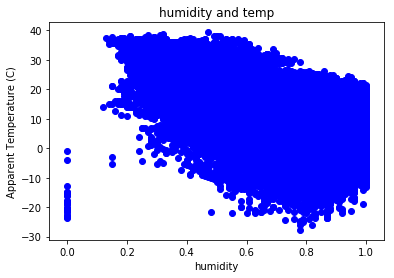

In [12]:
plt.title('humidity and temp')
plt.xlabel('humidity')
plt.ylabel('Apparent Temperature (C)')
plt.scatter(x['Humidity'], y, color='blue')